<a href="https://colab.research.google.com/github/MarkNoble-1/portfolio/blob/main/Trade%26Ahead_Unsupervised_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
%cd /content/drive/MyDrive/Data Science and Business Analytics/Unsupervised Learning
!jupyter nbconvert USL_Project_LearnerNotebook_FullCode.ipynb --to html

/content/drive/MyDrive/Data Science and Business Analytics/Unsupervised Learning
[NbConvertApp] Converting notebook USL_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 3305542 bytes to USL_Project_LearnerNotebook_FullCode.html


In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock_data = pd.read_csv('/content/drive/MyDrive/Data Science and Business Analytics/Unsupervised Learning/stock_data.csv')
sd = stock_data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
sd.shape

(340, 15)

Observations:

- there are 340 rows and 15 columns in the dataset

In [ ]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
sd.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


In [ ]:
sd.duplicated().sum()

0

Observations:

- there are 4 object datatypes and 11 integer or float datatypes

- there are no missing or duplicated values

In [ ]:
sd.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Observations:

- we will need to scale the data as the variables currently exist on different scales
- There are 11 different economic sectors represented in this data, and 104 different sub industries
- there is a huge amount of variation in Net Cash Flow and Net income, with the largest value up to 20bn and low values in negative 11bn

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### What does the distribution of stock prices look like?

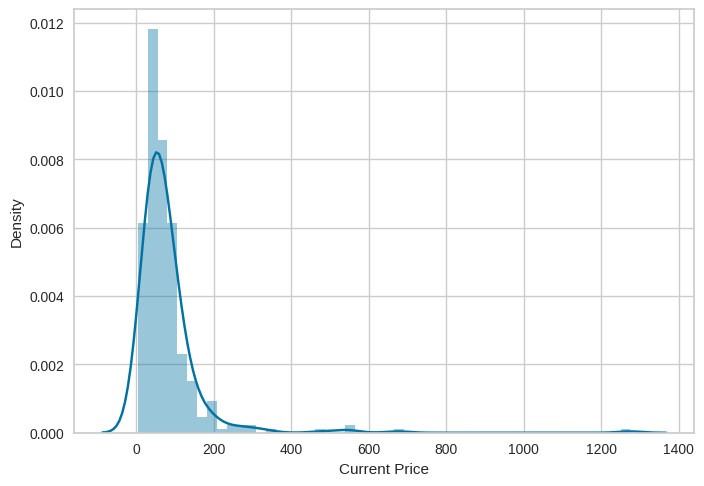

In [ ]:
sns.distplot(sd['Current Price'])
plt.show()

Observations:

- the distribution of stock prices is right skewed and has extreme upper outliers
- the vast majority of stocks in this dataset are priced between 0-200. the more expensive stocks likely represent more established stocks in the market

### The stocks of which economic sector have seen the maximum price increase on average?

In [ ]:
ec_sector_price_increase_avg = sd.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False)
ec_sector_price_increase_avg

,Price Change
GICS Sector,
Health Care,9.585652
Consumer Staples,8.684750
Information Technology,7.217476
Telecommunications Services,6.956980
Real Estate,6.205548
Consumer Discretionary,5.846093
Materials,5.589738
Financials,3.865406
Industrials,2.833127


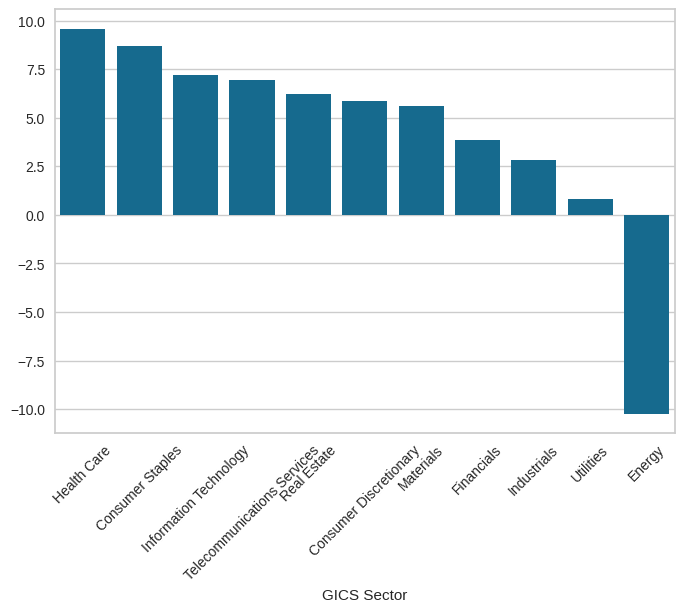

In [ ]:
sns.barplot(x=ec_sector_price_increase_avg.index, y=ec_sector_price_increase_avg.values)
plt.xticks(rotation=45)
plt.show()

Observations:

- Healthcare has seen the highest average percentage increase in price over 13 weeks in this data

### How are the different variables correlated with each other?

In [ ]:
sd_numeric_col = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']


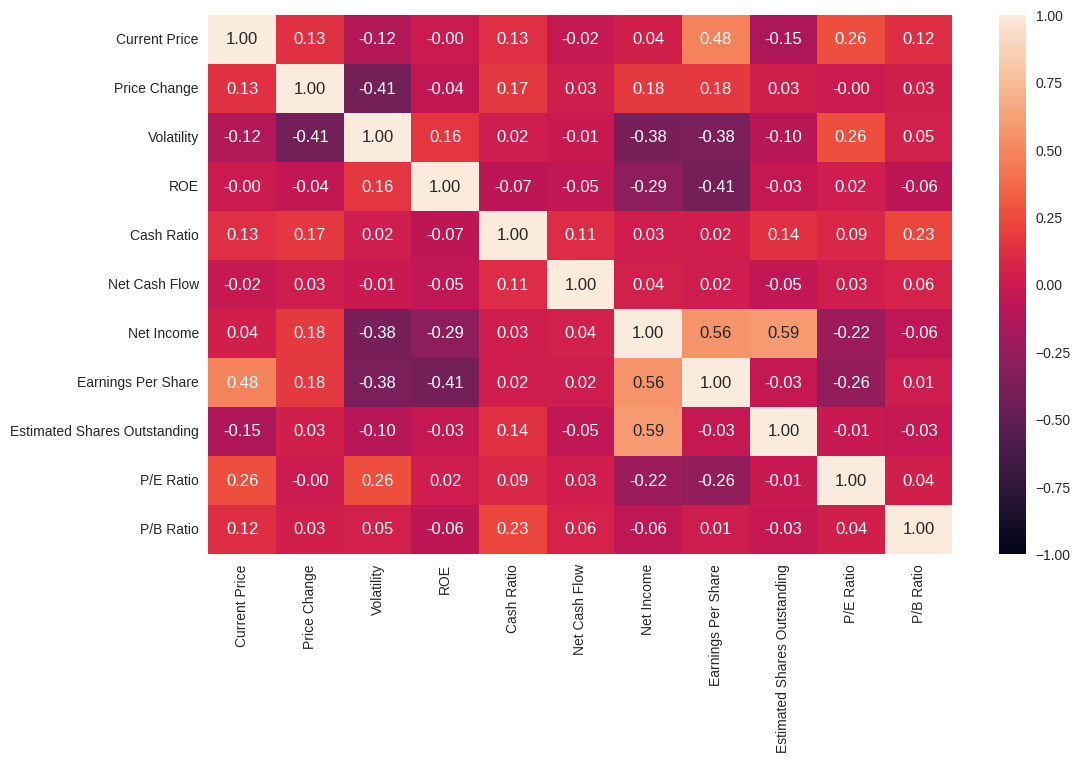

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(sd[sd_numeric_col].corr(), annot=True, fmt=".2f", vmax=1, vmin=-1)
plt.show()

Observations:

- Net Income fairly strongly positively correlated with both Earnings Per Share and Estimated Shares Outstanding

- Current Price is fairly strongly correlated with Earnings per share

- There is surprisingly low correlation between Net Income and Net Cash Flow.
  - this fact in the data might be due to the different industries, business models or stages of growth between the businesses in this data

- there is relatively strong negative correlation between Net Income and Volatility, and between ROE and both Net Income and Earnings per share in this dataset

### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [ ]:
ec_sectore_cash_ratio_avg = sd.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)
ec_sectore_cash_ratio_avg

,Cash Ratio
GICS Sector,
Information Technology,149.818182
Telecommunications Services,117.000000
Health Care,103.775000
Financials,98.591837
Consumer Staples,70.947368
Energy,51.133333
Real Estate,50.111111
Consumer Discretionary,49.575000
Materials,41.700000


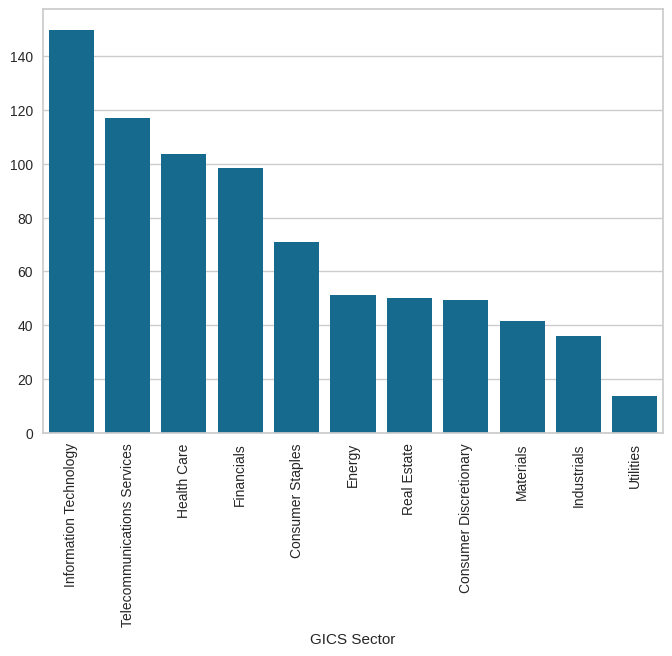

In [ ]:
sns.barplot(x=ec_sectore_cash_ratio_avg.index, y=ec_sectore_cash_ratio_avg.values)
plt.xticks(rotation=90)
plt.show()

Observations:

- average cash ratio is highest in Information Technology and lowest in Utilities

- the range of average cash ratio for the sectors is from about 17 to 130

### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
ec_sector_PE_avg = sd.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)
ec_sector_PE_avg

,P/E Ratio
GICS Sector,
Energy,72.897709
Information Technology,43.782546
Real Estate,43.065585
Health Care,41.135272
Consumer Discretionary,35.211613
Consumer Staples,25.521195
Materials,24.585352
Utilities,18.719412
Industrials,18.259380


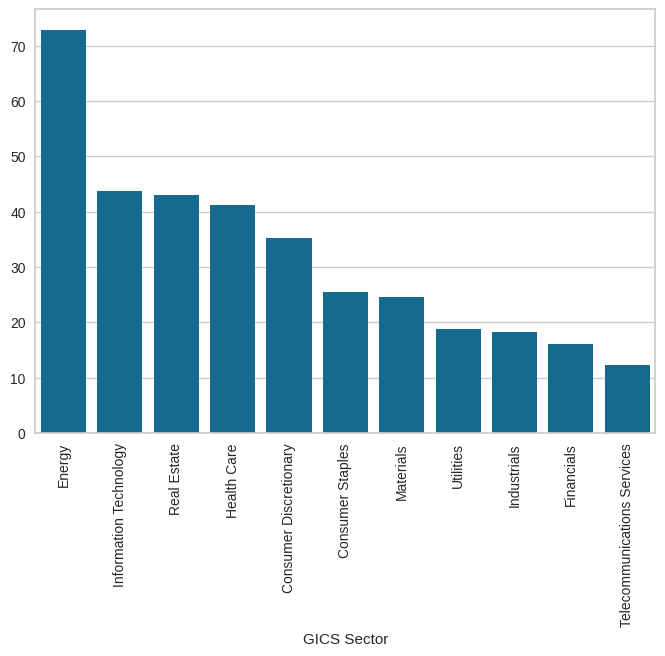

In [ ]:
sns.barplot(x=ec_sector_PE_avg.index, y=ec_sector_PE_avg.values)
plt.xticks(rotation=90)
plt.show()

Observations:

- Energy has significantly the highest average P/E ratio, where Telecommunications Services has the lowest

- There seem to be a few distinct groups within this data, where certain econmic sectors have similar average P/E ratios

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

- We established earlier there are no missing or duplicated values within the dataset

### Outlier Check

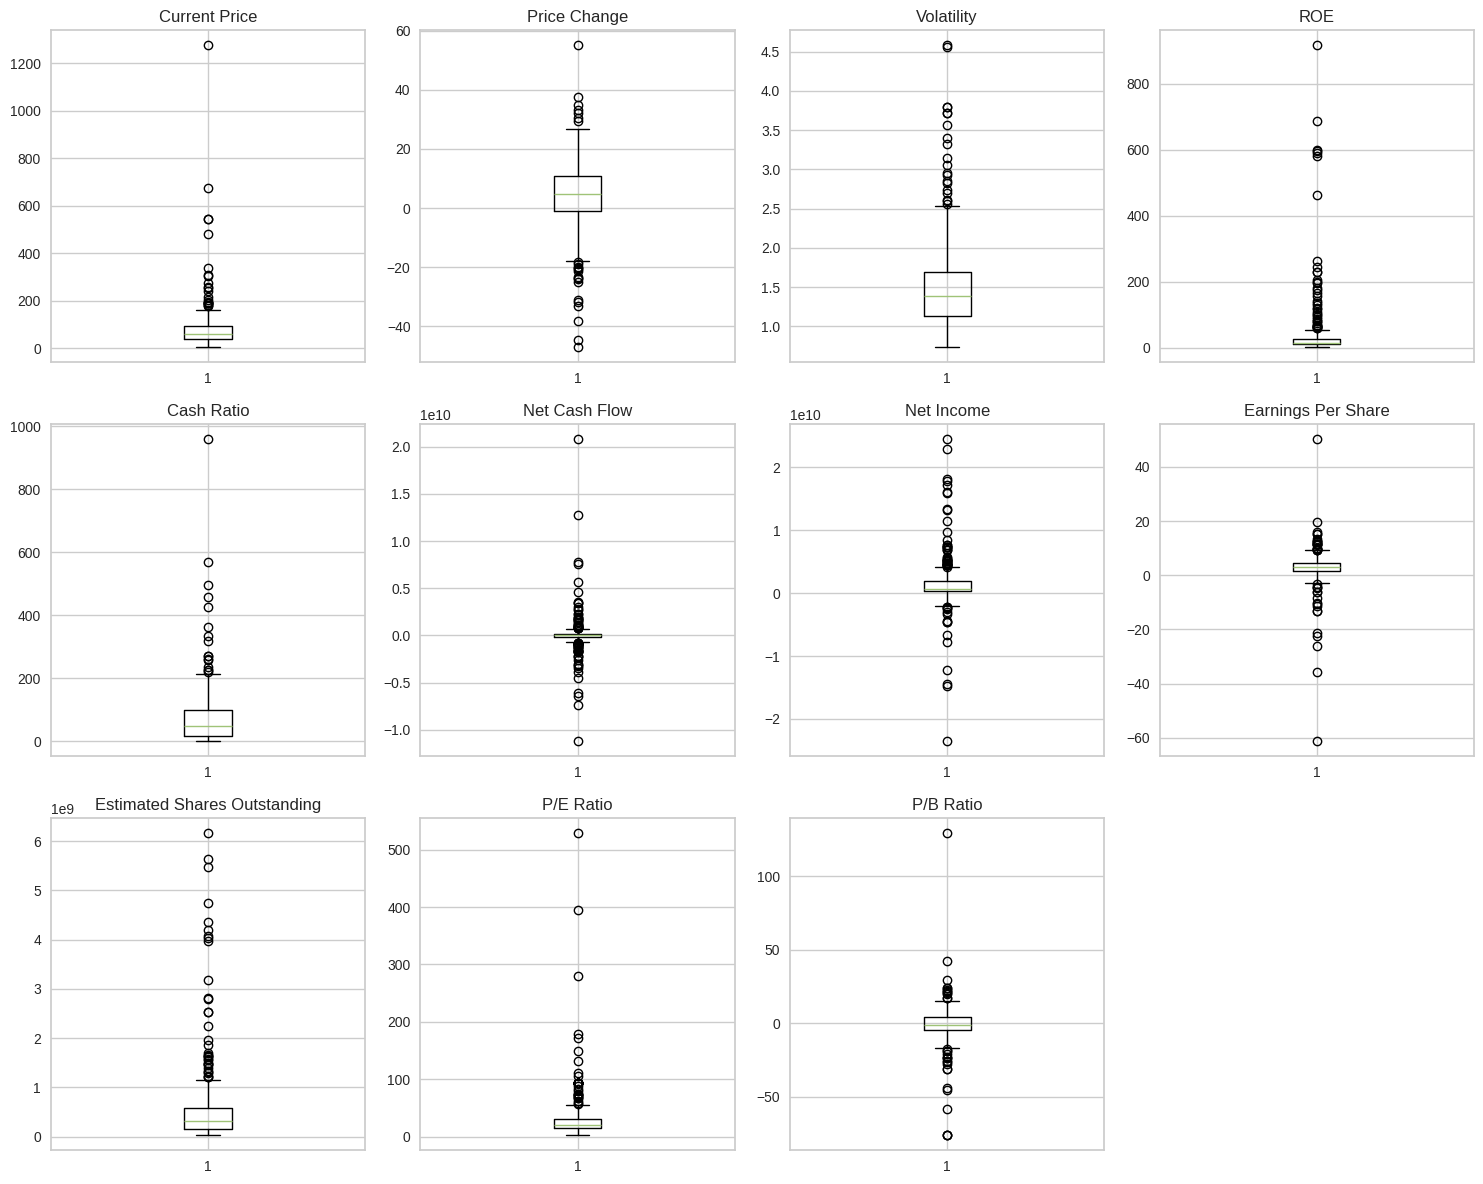

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = sd.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(sd[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


Observations:

- There are outliers in the data, but none of these values lie outside a range of possibility for their respective variables

### Scaling

In [ ]:
# Scaling the data before clustering
scaler = StandardScaler()
subset = sd[sd_numeric_col].copy()            # Extract the subset of numeric columns
sd_scaled = scaler.fit_transform(subset)  # Pass the subset to the scaler

In [ ]:
# Creating a dataframe from the scaled data

subset_scaled = pd.DataFrame(sd_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

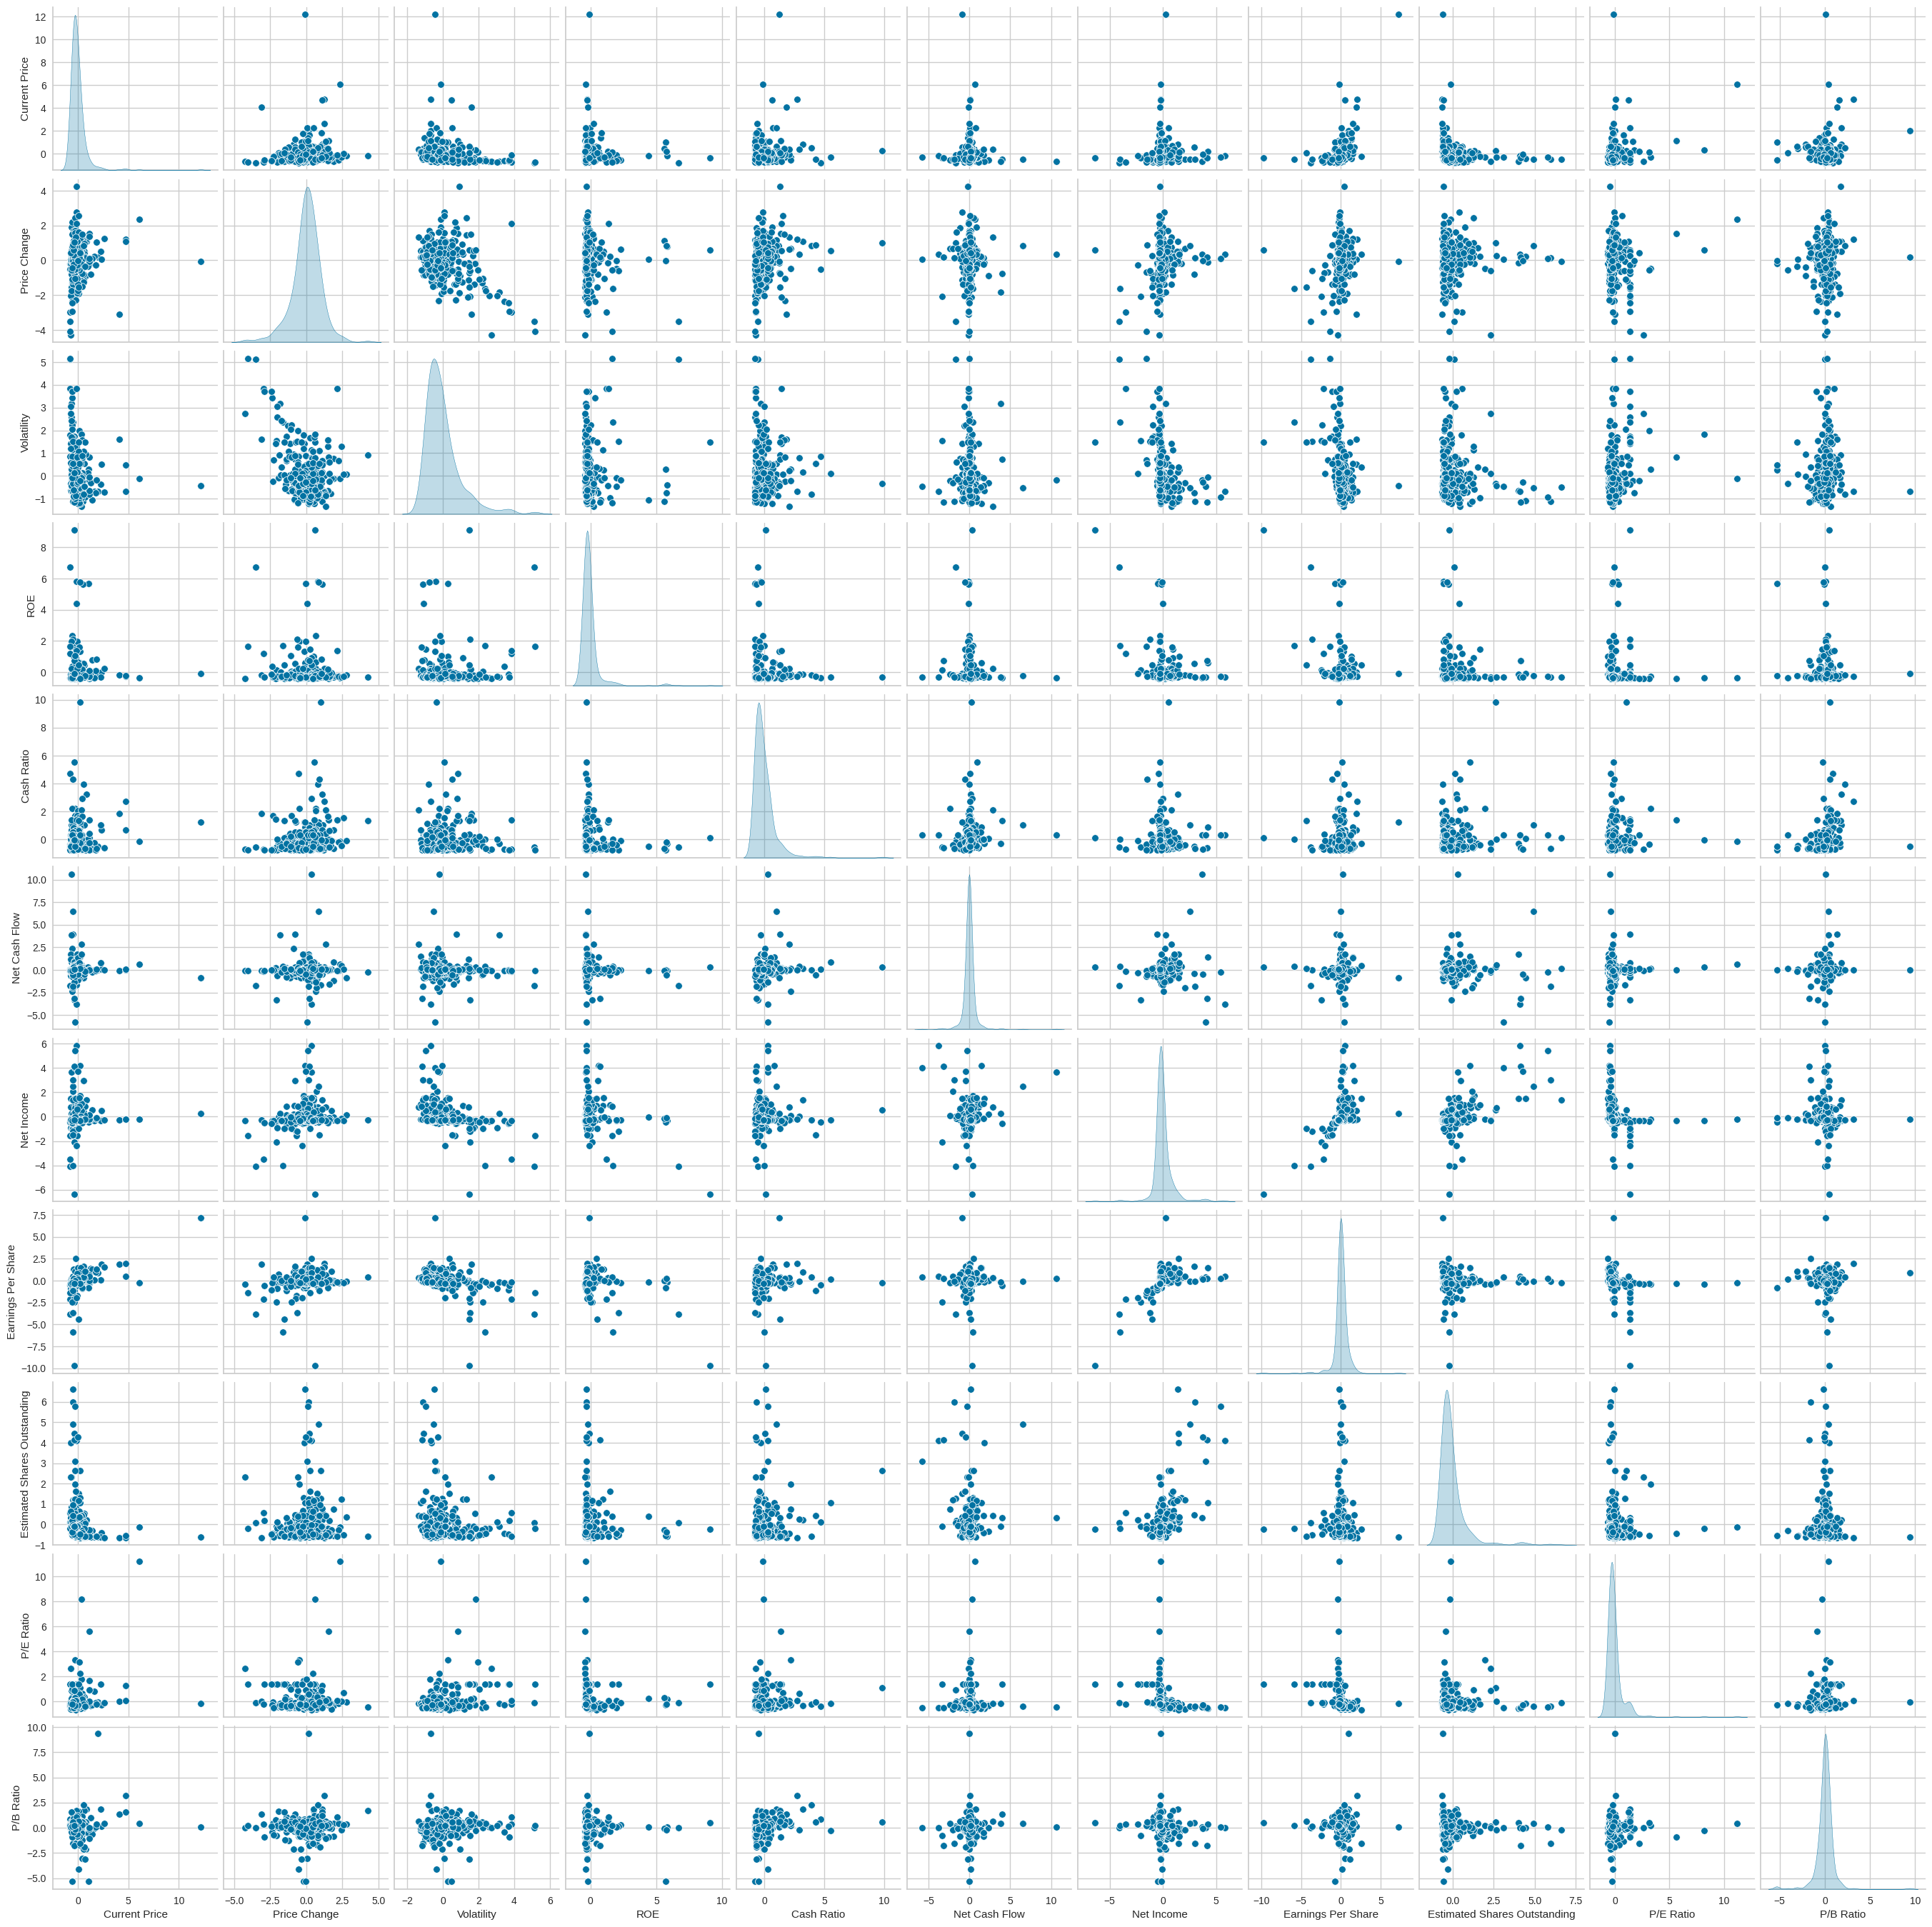

In [ ]:
sns.pairplot(data=subset_scaled, diag_kind='kde') #pairplots comparing different variables after scaling them
plt.show()

Observations:

- current price, volatility, cash ratio, estimated shares outstanding and P/E ratio are right skewed distributions

- There do not seem to be any strong linear relationships between the variables

- Price change is the most normally distributed variable in this data

## K-means Clustering

### Elbow Plot

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.485995798551461
Number of Clusters: 3 	Average Distortion: 2.33484853908491
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.1737047455822727
Number of Clusters: 6 	Average Distortion: 2.1614231839209284
Number of Clusters: 7 	Average Distortion: 2.0243477116620276
Number of Clusters: 8 	Average Distortion: 1.9858429710238417
Number of Clusters: 9 	Average Distortion: 1.9057780187640203
Number of Clusters: 10 	Average Distortion: 1.869533437659469


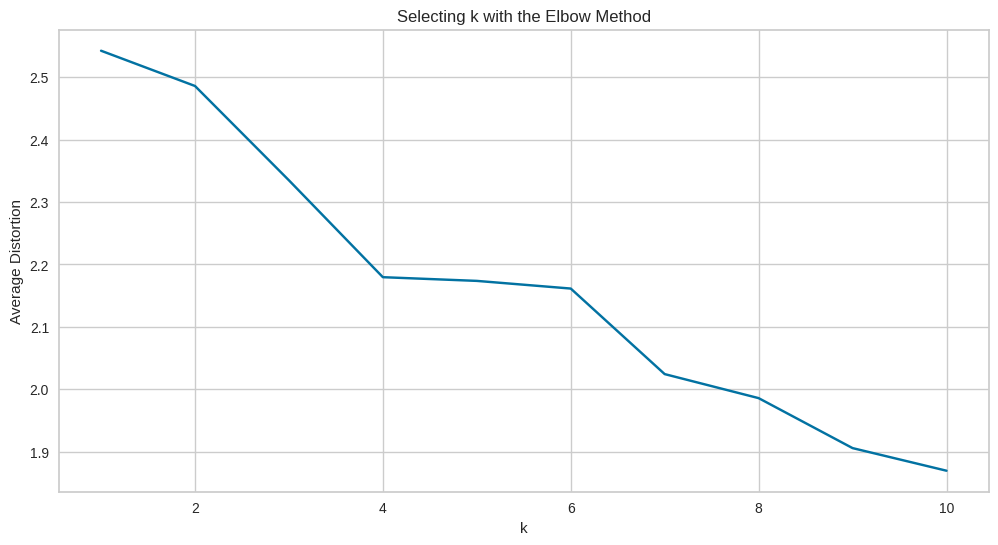

In [ ]:
clusters = range(1, 11)
meanDistortions = []

# Loop over different values of k (clusters)
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled)
    prediction = model.predict(subset_scaled)
    distortion = sum(np.min(cdist(subset_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled.shape[0]
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

# After the loop, plot the results
plt.figure(figsize=(12, 6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Observations:

- without an obvious 'elbow' to the plot, a good case can be made for k= 5, 6, or 7

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457)
For n_clusters = 3, silhouette score is 0.42601934568305555)
For n_clusters = 4, silhouette score is 0.42150871537649565)
For n_clusters = 5, silhouette score is 0.4422173639539302)
For n_clusters = 6, silhouette score is 0.42032940439396466)
For n_clusters = 7, silhouette score is 0.3875322382863676)
For n_clusters = 8, silhouette score is 0.12493582760555885)
For n_clusters = 9, silhouette score is 0.09171476756065676)
For n_clusters = 10, silhouette score is 0.09720583427377262)


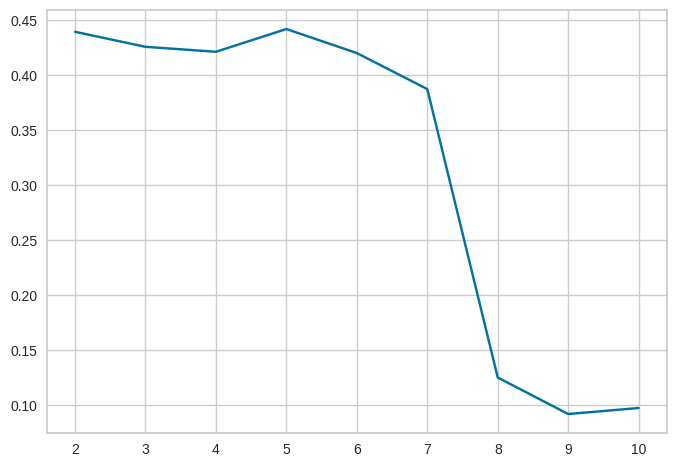

In [ ]:
sil_scores = []
cluster_list = list(range(2,11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    preds = clusterer.fit_predict(subset_scaled)
    centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled, preds, metric='euclidean')
    sil_scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_scores)

Observations:

- based on silhouette scores, the best value of K seems to be 5

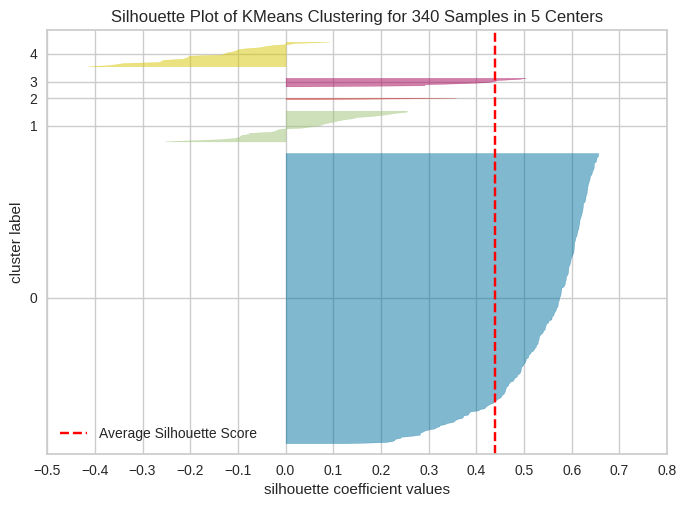

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1), colors='yellowbrick')
visualizer.fit(subset_scaled)
visualizer.show()

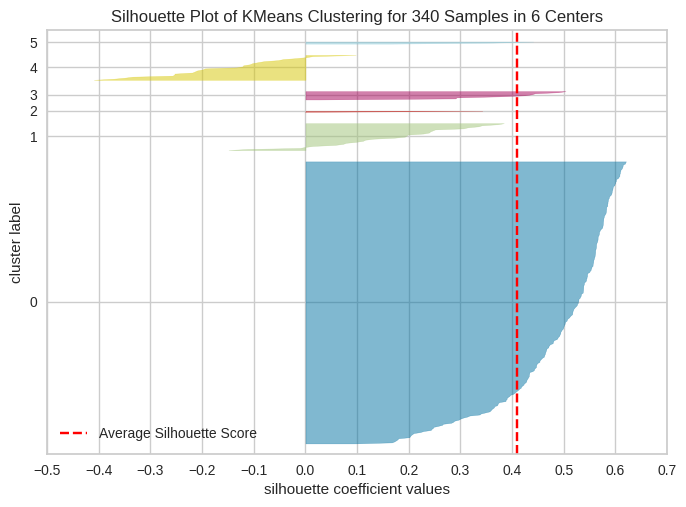

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1), colors='yellowbrick')
visualizer.fit(subset_scaled)
visualizer.show()

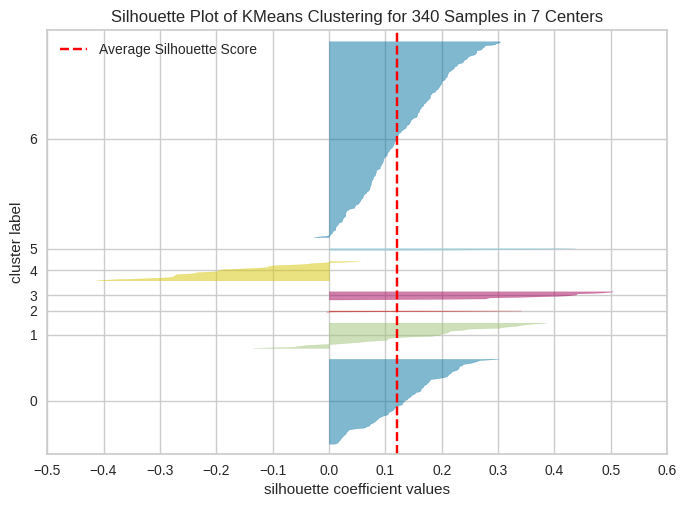

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1), colors='yellowbrick')
visualizer.fit(subset_scaled)
visualizer.show()

Observations:

- there seems to be one group that is much larger than the others
- because we do not have a clear elbow plot K value to select, and due to K=5 having the highest silhouette score and having a bend in the plot at K=5, we will select K=5

### Selecting the final model

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(subset_scaled)

#copying original data
sd_copy = sd.copy()

# adding kmeans cluster labels to original and scaled data
sd_copy['K_means_cluster'] = kmeans.labels_
subset_scaled['K_means_cluster'] = kmeans.labels_

### Cluster Profiling

In [ ]:
cluster_profile = sd_copy.groupby('K_means_cluster')[numeric_columns].mean()  # Calculate mean of features for each cluster, scaled
cluster_profile['cluster_size'] = sd_copy.groupby('K_means_cluster')['Security'].count().values #add size of each cluster
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,cluster_size
K_means_cluster,,,,,,,,,,,,
0,72.738269,5.179897,1.380738,34.825455,53.138182,-1.014729e+07,1.488642e+09,3.636164,4.379616e+08,23.680917,-3.395254,275
1,65.106668,-11.888125,2.722141,44.000000,61.400000,-3.685830e+07,-2.137169e+09,-5.560333,5.297142e+08,113.488924,0.905486,30
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141,2
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193,9
4,211.164720,12.456786,1.699388,30.708333,280.250000,2.197085e+09,2.808601e+09,6.818333,7.389574e+08,37.895420,15.682619,24


In [ ]:
cluster_profile = subset_scaled.groupby('K_means_cluster').mean()  # Calculate mean of features for each cluster, not scaled
cluster_profile['cluster_size'] = subset_scaled.groupby('K_means_cluster').size()  # add size of each cluster
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,cluster_size
K_means_cluster,,,,,,,,,,,,
0,-0.082974,0.091895,-0.245781,-0.049495,-0.187016,-0.033797,-0.001460,0.130661,-0.164653,-0.201693,-0.120247,275
1,-0.160919,-1.331784,2.024216,0.045671,-0.095511,-0.047541,-0.923037,-1.267390,-0.056019,1.826333,0.188131,30
2,-0.575803,-1.453888,3.311126,7.908297,-0.210698,-0.693613,-5.236157,-6.778822,-0.068025,0.635362,0.235430,2
3,-0.349197,0.090783,-0.755776,-0.151413,-0.129476,-1.593107,3.394221,0.100165,4.721654,-0.384263,-0.332412,9
4,1.330828,0.698876,0.293458,-0.092201,2.328392,1.101902,0.334036,0.614415,0.191722,0.119296,1.247700,24


Observations:

- we have 1 very large cluster and 1 very small cluster
- The K-Means method may not be the best method to cluster this data

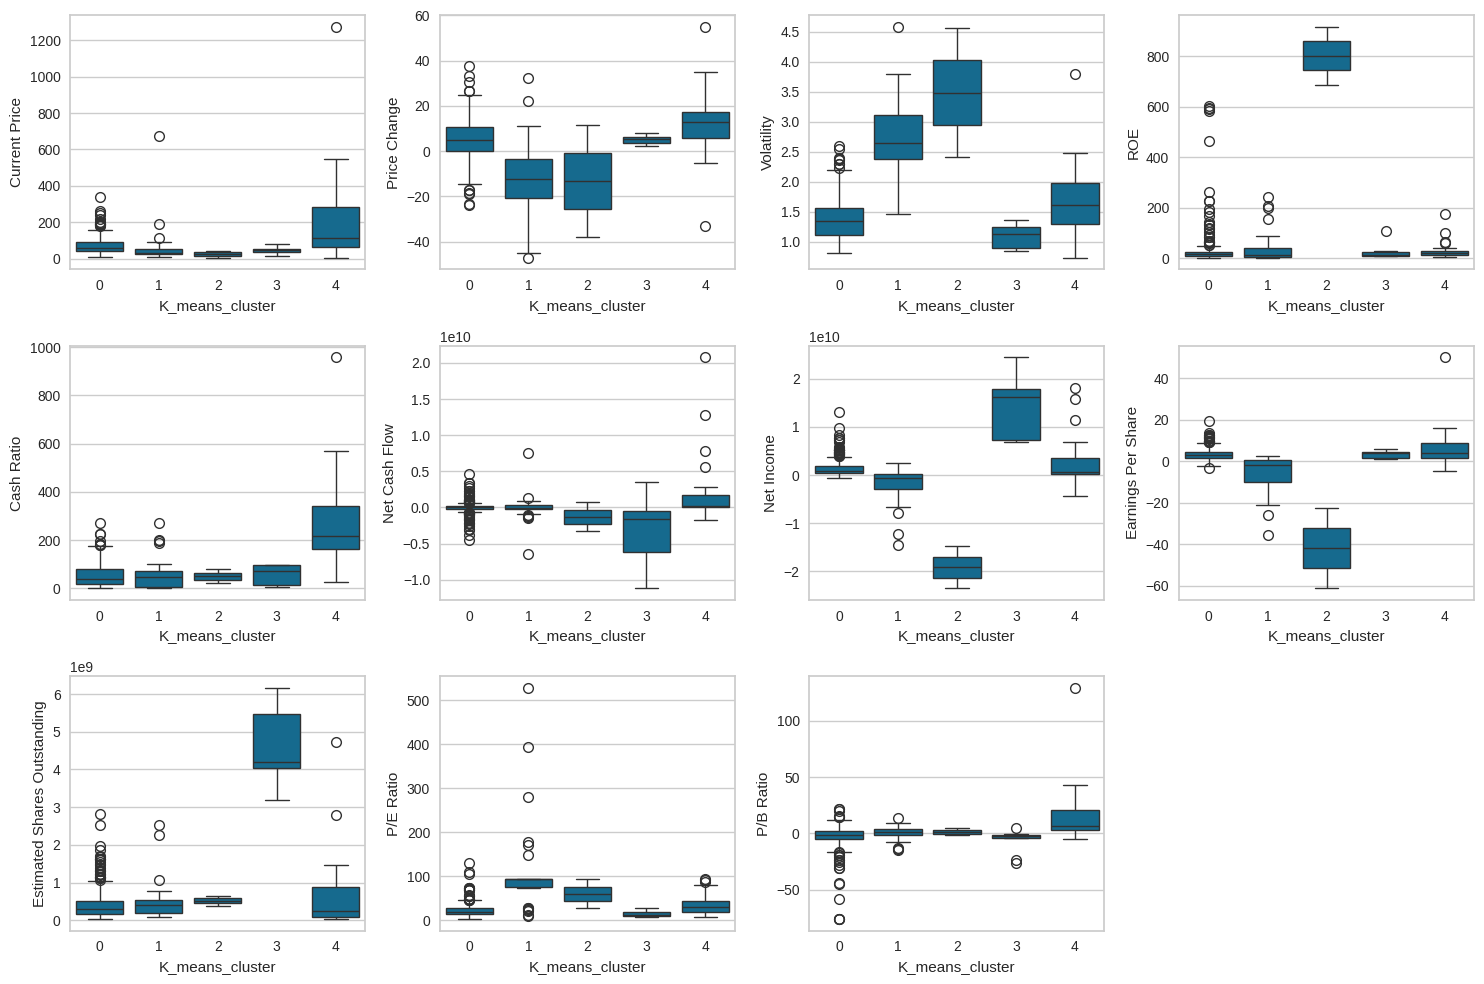

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='K_means_cluster', y=col, data=sd_copy)
    plt.tight_layout()

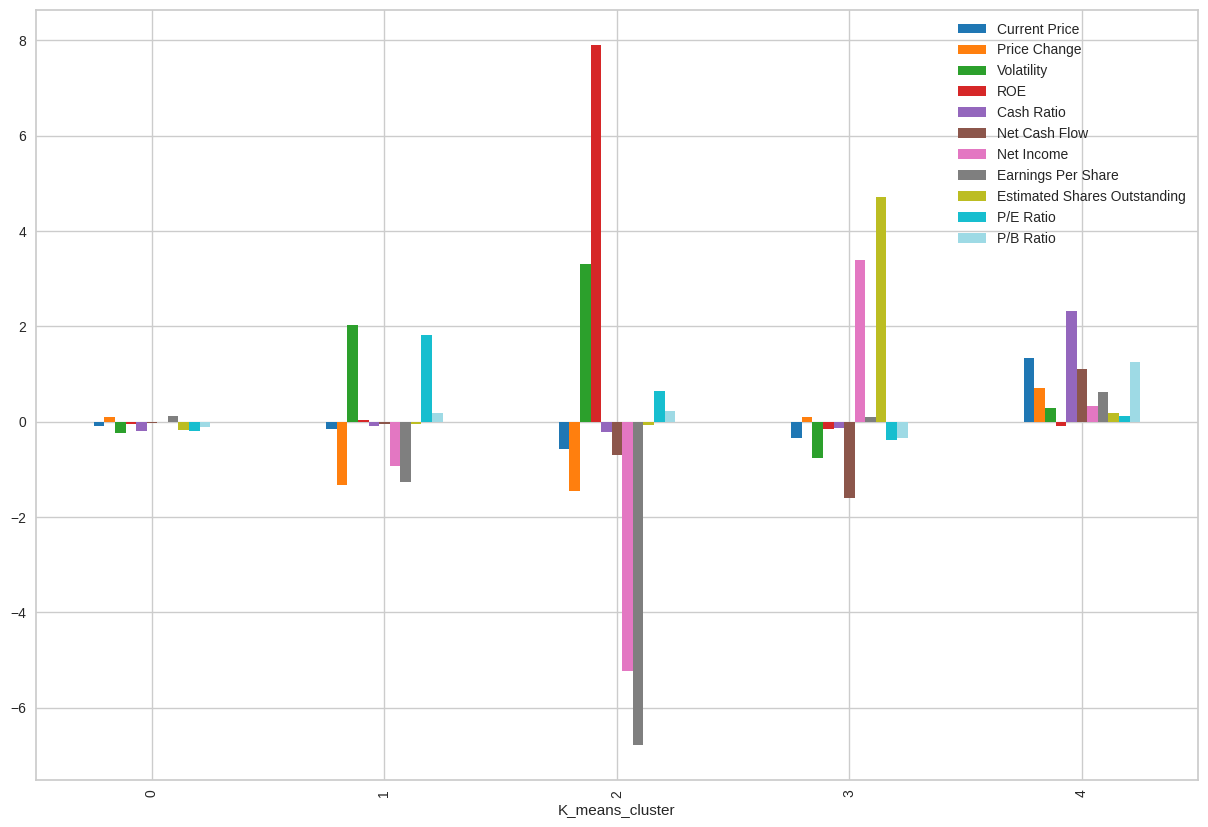

In [ ]:
subset_scaled.groupby('K_means_cluster')[numeric_columns].mean().plot.bar(figsize=(15, 10),colormap='tab20')
plt.show()

In [ ]:
sd_copy.groupby(["K_means_cluster","GICS Sector"])['Ticker Symbol'].count()

K_means_cluster  GICS Sector                
0                Consumer Discretionary         33
                 Consumer Staples               17
                 Energy                          5
                 Financials                     45
                 Health Care                    29
                 Industrials                    52
                 Information Technology         24
                 Materials                      18
                 Real Estate                    26
                 Telecommunications Services     2
                 Utilities                      24
1                Consumer Discretionary          1
                 Energy                         21
                 Health Care                     1
                 Industrials                     1
                 Information Technology          4
                 Materials                       2
2                Energy                          2
3                Consumer Discretionary          1
                 Consumer Staples                1
                 Energy                          1
                 Financials                      3
                 Health Care                     1
                 Telecommunications Services     2
4                Consumer Discretionary          5
                 Consumer Staples                1
                 Energy                          1
                 Financials                      1
                 Health Care                     9
                 Information Technology          5
                 Real Estate                     1
                 Telecommunications Services     1
Name: Ticker Symbol, dtype: int64

Observations:

- Cluster 0 (Size 275)
  - All variables are close to dataset averages, due to size of cluster
  - Lowest average Estimated Shares Outstanding
- Cluster 1 (Size 30)
  - Highest average P/E ratio of all clusters
  - More than 75% of the stocks in Cluster 1 have a negative Price Change
- Cluster 2 (Size 2)
  - smallest cluster, with only 2 rows in the data
  - by far the highest average ROE of all clusters
  - highest average Volatility
  - lowest averate Price Change, Net Income and Earnings Per Share
- Cluster 3 (Size 9)
  - Highest average Estimated Shares Outstanding and Net Income
  - Lowest average Net Cash Flow
- Cluster 4 (Size 24)
  - Highest average Current Price, Price Change, Net Cash Flow, P/B Ratio, Earnings Per Share, and Cash Ratio
  - Does not have the lowest average of any single variable

Observations:

- K-Means clustering has given some distinct clusters, but the dataset is dominated by 1 large cluster, with 2 small clusters and 2 very small clusters

## Hierarchical Clustering

Checking Cophenetic Correlation

In [ ]:
hc_sd = subset_scaled.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", ]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_sd, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_sd))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9381866862278843.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8741250189456776.
Cophenetic correlation for Euclidean distance and average linkage is 0.9501078999418133.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8950437139160046.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9327825401743682.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8238581136070481.
Cophenetic correlation for Chebyshev distance and average linkage is 0.941660816516849.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8974299860845545.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9375736709363667.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8440553871479906.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9405496499144259.
Cophenetic cor

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9501078999418133, which is obtained with Euclidean distance and average linkage.


**Using Euclidean Distance Only**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_sd, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_sd))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9381866862278843.
Cophenetic correlation for complete linkage is 0.8741250189456776.
Cophenetic correlation for average linkage is 0.9501078999418133.
Cophenetic correlation for centroid linkage is 0.9488456422293653.
Cophenetic correlation for ward linkage is 0.7796428374975963.
Cophenetic correlation for weighted linkage is 0.8950437139160046.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9501078999418133, which is obtained with average linkage.


Observations:

- the cophenetic correlation is maximized with Euclidean distance and average linkage

### Checking Dendrograms

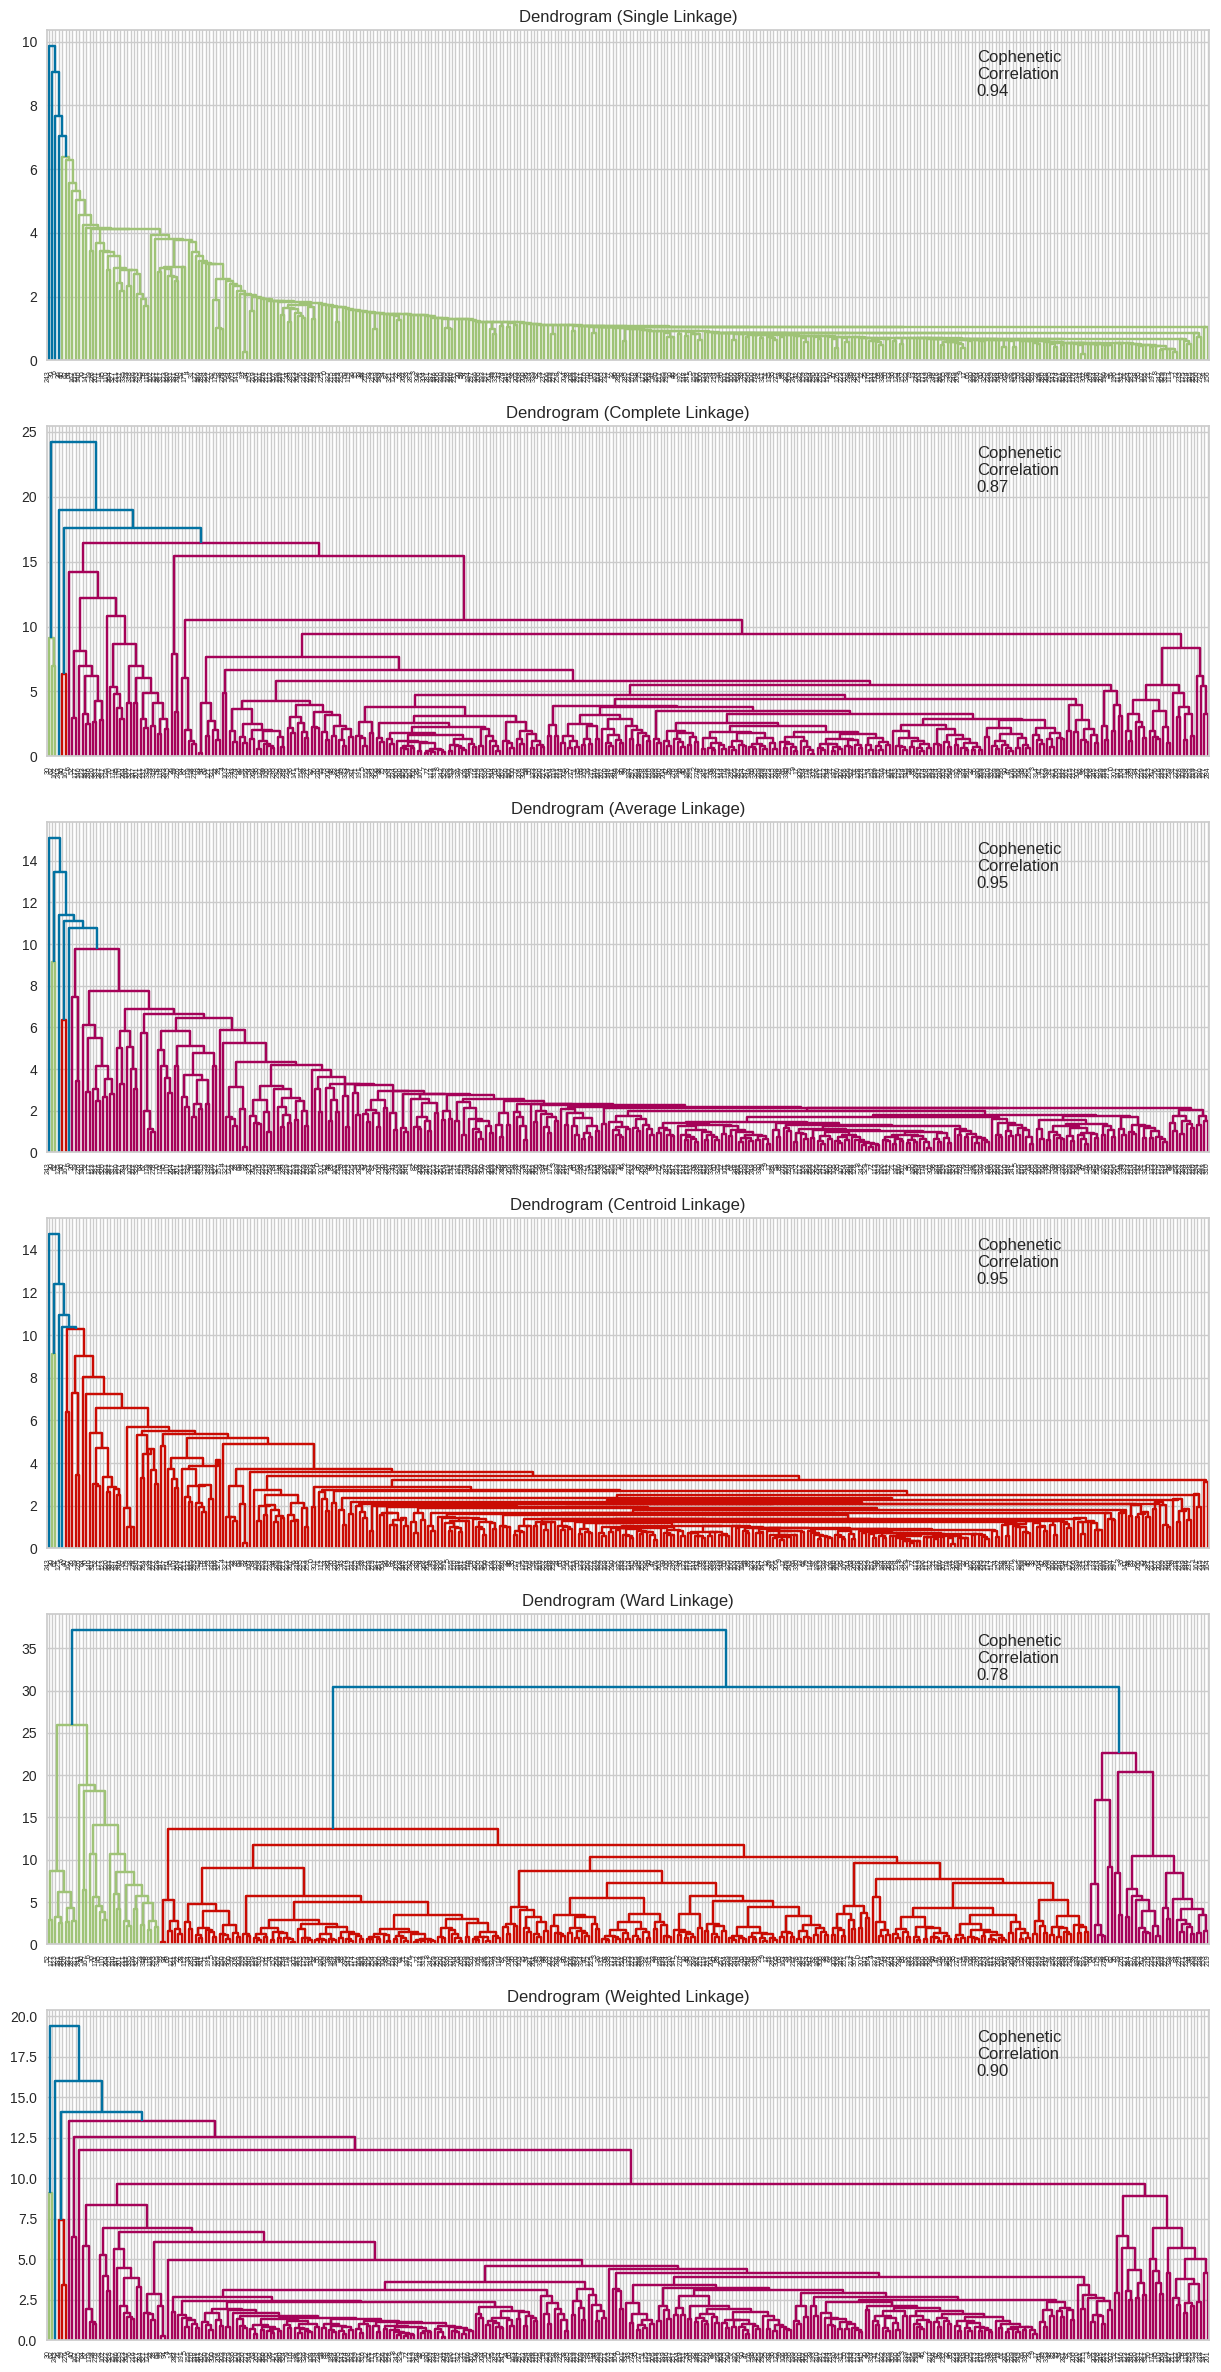

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_sd, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_sd))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Observations:

- the cophenetic correlation is highest for average linkage methods
- 6 seems to be the best number of clusters from the average linkage dendogram


### Creating a Model using sklearn

In [ ]:
HCmodel_avg = AgglomerativeClustering(n_clusters=6,linkage='average') #defnining heirarchical clustering model using Eucledian distance and average linkage
HCmodel_avg.fit(hc_sd)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
labels = HCmodel_avg.fit_predict(hc_sd)
sd_copy_2 = sd.copy()
hc_sd['HC_cluster'] = HCmodel_avg.labels_
sd_copy_2['HC_cluster'] = HCmodel_avg.labels_

numeric_columns_2 = sd_copy_2.select_dtypes(include=np.number).columns.tolist()

### Cluster Profiling

In [ ]:
cluster_profile = sd_copy_2.groupby('HC_cluster')[numeric_columns_2].mean()  # Calculate mean of features for each cluster
cluster_profile['cluster_size'] = sd_copy_2.groupby('HC_cluster')['Security'].count().values #size of each cluster
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_cluster,cluster_size
HC_cluster,,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-3.319732e+07,1.538075e+09,2.88527,5.605050e+08,32.441706,-2.174921,0.0,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.29500,2.791829e+09,13.649696,1.508484,1.0,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141,2.0,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467,3.0,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429,4.0,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.91000,6.695185e+07,31.040405,129.064585,5.0,1


- We are not getting distinct clusters when using average linkage. The dendogram that shows the most distinction between clusters for is the dendogram with Ward linkage and cophenetic correlation .78

- 6 seems to be a good number of clusters with Ward linkage for capturing distinct groups, however 3 clusters combines some of the smaller clusters, making for a more simple model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6,linkage='ward') #defnining heirarchical clustering model using Eucledian distance and ward linkage
HCmodel.fit(hc_sd)
sd_copy_2 = sd.copy()
hc_sd['HC_cluster'] = HCmodel.labels_
sd_copy_2['HC_cluster'] = HCmodel.labels_

numeric_columns_2 = sd_copy_2.select_dtypes(include=np.number).columns.tolist()

cluster_profile = sd_copy_2.groupby('HC_cluster')[numeric_columns_2].mean()  # Calculate mean of features for each cluster
cluster_profile['cluster_size'] = sd_copy_2.groupby('HC_cluster')['Security'].count().values #size of each cluster
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_cluster,cluster_size
HC_cluster,,,,,,,,,,,,,
0,211.164720,12.456786,1.699388,30.708333,280.250000,2.197085e+09,2.808601e+09,6.818333,7.389574e+08,37.895420,15.682619,0.0,24
1,84.355716,3.854981,1.827670,633.571429,33.571429,-5.684000e+08,-4.968157e+09,-10.841429,3.981690e+08,42.284541,-11.589502,1.0,7
2,71.944683,4.954784,1.389487,24.860294,54.974265,-2.050665e+06,1.495304e+09,3.651011,4.451893e+08,24.298891,-3.083861,2.0,272
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193,3.0,9
4,34.589200,-15.972570,2.860357,51.680000,42.040000,-1.615758e+08,-2.630391e+09,-6.797200,4.956420e+08,77.206371,1.300158,4.0,25
5,327.006671,21.917380,2.029752,4.000000,106.000000,6.982407e+08,2.875470e+08,0.750000,3.667632e+08,400.989188,-5.322376,5.0,3


### Selecting the Final Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3,linkage='ward') #defnining heirarchical clustering model using Eucledian distance and ward linkage
HCmodel.fit(hc_sd)
sd_copy_2 = sd.copy()
hc_sd['HC_cluster'] = HCmodel.labels_
sd_copy_2['HC_cluster'] = HCmodel.labels_

numeric_columns_2 = sd_copy_2.select_dtypes(include=np.number).columns.tolist()

cluster_profile = sd_copy_2.groupby('HC_cluster')[numeric_columns_2].mean()  # Calculate mean of features for each cluster
cluster_profile['cluster_size'] = sd_copy_2.groupby('HC_cluster')['Security'].count().values #size of each cluster
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_cluster,cluster_size
HC_cluster,,,,,,,,,,,,,
0,166.303130,10.468544,1.530292,29.151515,219.727273,7.686074e+08,6.092194e+09,5.895758,1.782413e+09,31.813774,9.672580,0.0,33
1,69.606858,-8.759350,2.582625,163.971429,45.828571,-1.692421e+08,-2.847835e+09,-6.959143,4.651007e+08,97.974818,-1.845420,1.0,35
2,71.944683,4.954784,1.389487,24.860294,54.974265,-2.050665e+06,1.495304e+09,3.651011,4.451893e+08,24.298891,-3.083861,2.0,272


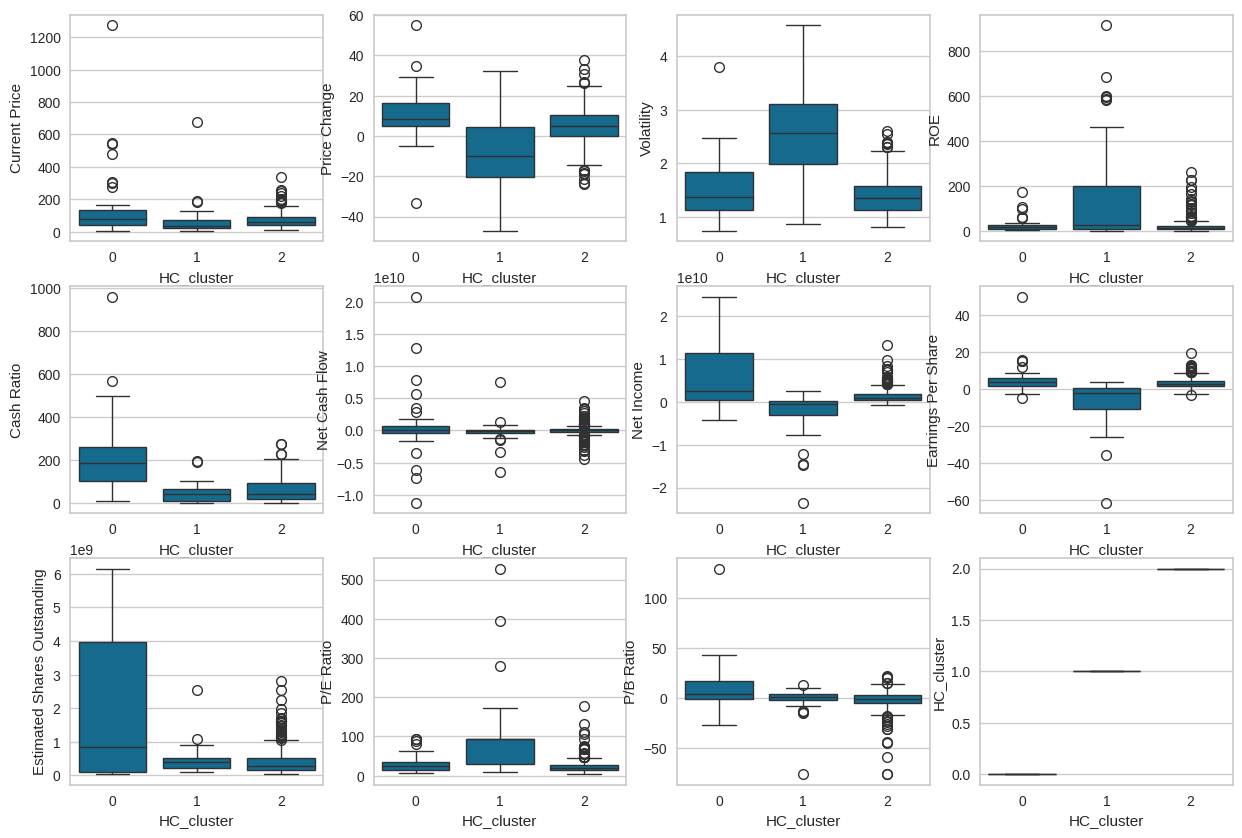

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns_2):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='HC_cluster', y=col, data=sd_copy_2)

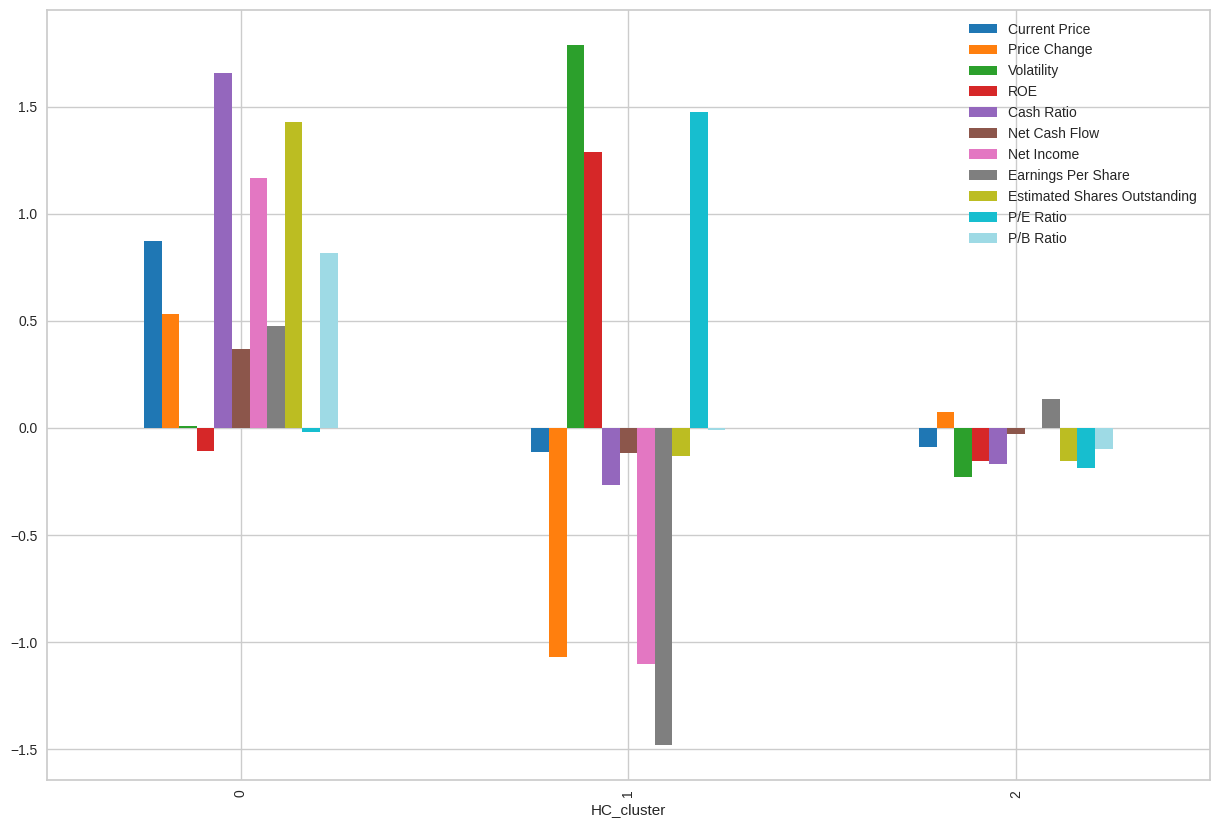

In [ ]:
hc_sd.groupby('HC_cluster')[numeric_columns].mean().plot.bar(figsize=(15, 10),colormap='tab20')
plt.show()

Observations:

- Cluster 0: (size 33)
  - Highest average Current Price, Price Change, Cash Ratio, Net Cash Flow, Net Income, Earnings Per Share, Estamated Shares Outstanding and P/B ratio of all clusters
  - Largest distribution of Estimated Shares Outstanding
  - More than 75% of stocks in the cluster have a positive Price Change and positive Earnings Per Share
  - The highest value of Earnings Per Share in the data set belongs to cluster 0, although it is an outlier
  - All stocks in the cluster have a Volatility value below about 2.5, with 1 outlier above
  - Cluster 0 does not have the lowest average of any variable among all clusters

- Cluster 1: (size 35)
  - Highest average Volatility,ROE, and P/E Ratio of all clusters
  - Lowest average Current Price, Price Change, Cash Ratio, Net Cash Flow, Net Income, and Earnings Per Share of all clusters
  - Largest distribution of Price Change, Volatility, ROE, Earnings Per Share, and P/E Ratio of all clusters
  - about 75% of companies in Cluster 1 have negative Net Income and negative Earnings Per Share

- Cluster 2: (size 272)
  - Cluster 2 has averages that are very close to dataset averages due to the size of the cluster
  - Lowest average Volatility, ROE, Cash Ratio, Estimated Share Outstanding P/E Ratio and P/B Ratio
  - Cluster 2's only variable averages that are larger than the dataset average are Price Change and Earnings Per Share
  - About 75% of the companies in Cluster 2 have positive Net Income, but the distribution is narrow
  - Over 75% of the stocks in Cluster 2 have positive Earnings Per Share


Observations:

- the Heirarchichal clustering model produces more disticnt groups and information on the different clusters

## K-means vs Hierarchical Clustering

Observations:

- K-Means clustering took less time to compute, but it was difficult to select the number of clusters based on unclear results from the elbow chart. Although a value of 6 was suggested by silhouette scores, the clusters were not well distributed among the dataset, and some were too small to be meaningful

- Heirarchichal Clustering did not give more distinct clusters initially, until Ward linkage was used. The number of clusters was decreased, combining smaller clusters together. The largest cluster remained at a size of 272, even when reducing the number of clusters.

- The clusters of both algorithms are fairly distinct from one another, besides the largest clusters.
  - The largest cluster in K-Means clustering had 275 rows, while the largest cluster in Heirarchichal clustering had 272. Both of these clusters had only Price Change and Earnings Per Share averages that were larger than the dataset average.

- Based on the elbow plot the K-Means clustering model suggested about 6 clusters. Based on the dendogram with the highest cophenetic correlation, 6 clusters were suggested for Heirarchical clusterng, although 3 were chosen with using the Ward linkgage method as the Ward method provided more distinct clusters

## Actionable Insights and Recommendations

- I would recommend using the Hierarchical clustering model for this data using the Ward linkage method, as the clusters are more distinct and are easier to interpret

**Cluster 0:**

- Cluster 0 is made up of stocks that are relatively high performers, and are generally stable stocks.

- Cluster 0 has the highest averages for key metrics such as the Current Price, Price Change, Cash Ratio, Net Cash Flow, Net Income, Earnings Per Share, Estamated Shares Outstanding and P/B ratio of all clusters.
  - This suggests that stocks in cluster 0 are issued by financially strong companies.
  - These companies are likely good investments for those looking for low volatility and high growth potential.
  - The Earnings Per Share average is likely somewhat skewed by the outliers, but regardless over 75% of the stocks in Cluster 0 have a positive Earnings Per Share value

Recommendation: Trade&Ahead should do more research on the stocks Cluster 0 to provide further context and data on historical performance and projected growth. They can potentially create an ETF based on the stocks in this fund for investors.

**Cluster 1:**

- Cluster 1 stocks have the most Volatility of the clusters, and represent riskier investments.

- The data suggests that Cluster 1 may contain both unprofitable or struggling companies, and others that are experiencing growth and increase in profitability. This cluster resembles a high-risk, high-reward investing portfolio.

Recommendation: Trade&Ahead should do more research on the stocks Cluster 1 to provide further context and data on historical performance to draw additional insights. They may find that some of the stocks in this cluster would be good investments for investors looking for speculative investments in a high-risk, high-reward scenario.

**Cluster 2:**

- Cluster 2 is the largest cluster by far, and represents more average performers within the dataset. This is likely due to the cluster's size. That being said, many of the stocks in Cluster 2 perform similarly, as their distributions are relatively narrow.

- These stocks have a low Volatility on average, and do represent small earnings for investors on average.

Recommendation: Trade&Ahead should do more research on the stocks in Cluster 2 to provide further context and historical data on these stocks. They may be able to cluster just these stocks futher, to help better understand this cluster. Trade&Ahead could create an ETF based on these stocks for investors looking for low risk, inflation-mitigating investments.

